In [2]:
import numpy as np
from scipy.optimize import curve_fit, fsolve
from scipy.special import jv
from amid import AMID
import matplotlib.pyplot as plt

In [2]:
alphas = []
nalpha = 150
for i in np.arange(4, 600):
    g = lambda a: a/np.tan(a) - 1
    sol = fsolve(g, i)
    alphas.append(sol)
alphas = np.unique(np.around(alphas, 8))**2
alphas = alphas[:nalpha]

0.0
0.001
0.0031622
0.01
0.041622
0.1
0.31622


C:\Users\mitch\.conda\envs\Spyder425\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


1.0


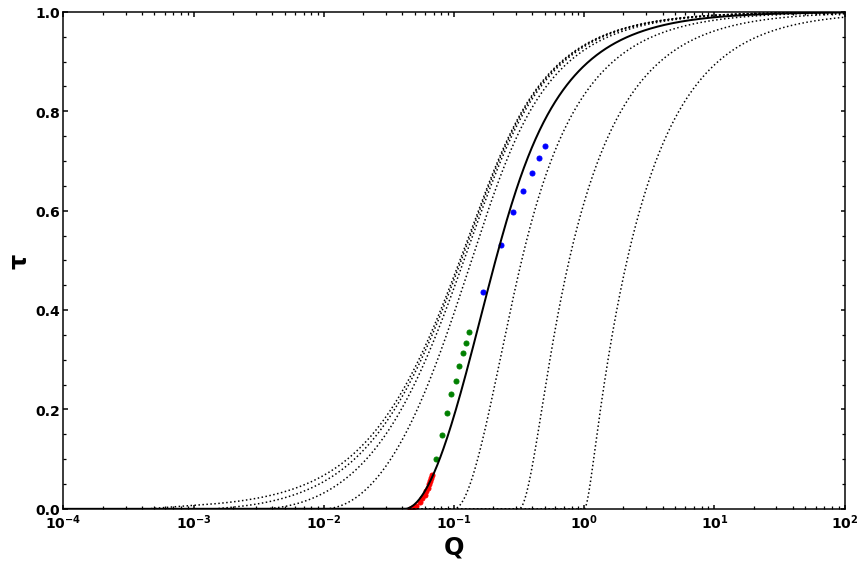

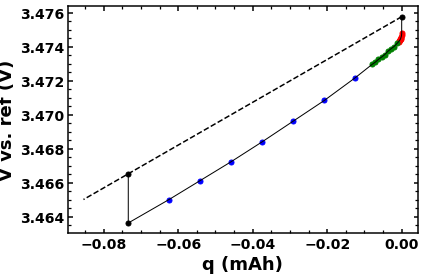

In [4]:
# Plot Atlung curve with various R_Ohm
R_Ohm = np.array([0, 1e-3, 3.1622e-3, 1e-2, 4.1622e-2, 1e-1, 3.1622e-1, 1])
#R_Ohm = np.array([4.1622e-2])
nQ = 1000
A = 3
B = 5

tau_thr1 = np.zeros(len(R_Ohm))
Q_thr1 = np.zeros(len(R_Ohm))
tau_thr2 = np.zeros(len(R_Ohm))
Q_thr2 = np.zeros(len(R_Ohm))
with plt.style.context('grapher'):                    
        
    plt.figure(figsize = (12, 8))

    Qdata1 = np.multiply([936.9481272, 982.020253, 1042.269145, 1125.729004, 1171.061585, 1241.139349, 1260.027133, 1306.831193, 1318.09162, 1344.926151, 1361.610518, 1394.621839], 4.8622e-5)
    taudata1 = [5.25006E-05, 0.000762789, 0.005267077, 0.013235003, 0.021261131, 0.02811711, 0.035631382, 0.042006877, 0.049234325, 0.055686901, 0.062348378, 0.068042586]
    
    Qdata2 = np.multiply([1495.507507, 1674.794112, 1802.17781, 1947.694541, 2126.962134, 2263.775466, 2391.172472, 2547.194879, 2666.960726], 4.8622e-5)
    taudata2 = [0.099626092, 0.148667614, 0.193645323, 0.230518091, 0.258102397, 0.286675559, 0.313220784, 0.333292378, 0.355819606]

    Qdata3 = np.multiply([3413.088058, 4691.579021, 5850.304137, 7009.766893, 8125.317216, 9186.439924, 10245.73184], 4.8622e-5)
    taudata3 = [0.436541704, 0.530730191, 0.596546795, 0.640533252, 0.675667141, 0.706478165, 0.731039196]
    
    plt.semilogx(Qdata1, taudata1, 'or', markersize=5)
    plt.semilogx(Qdata2, taudata2, 'og', markersize=5)
    plt.semilogx(Qdata3, taudata3, 'ob', markersize=5)
    
    for i in range(len(R_Ohm)):
        print(R_Ohm[i])
        Q_arr = np.logspace(-4, 2, nQ)
        tau_sol = np.zeros(nQ)
        tau_guess = 0.5
        for j in range(nQ):
            Q = Q_arr[j]
            func = lambda tau: tau - 1 + (1/(A*Q))*(1/B - 2*(np.sum(np.exp(-alphas*tau*Q)/alphas))) + R_Ohm[i]/Q if R_Ohm[i]<Q else tau 
            tau_sol[j] = fsolve(func, tau_guess, factor=1.)
            if tau_sol[j] < 0:
                tau_sol[j] = 0

        for j in range(nQ):
            Q = Q_arr[j]
            if 1/B*0.01 < 2*(np.sum(np.exp(-alphas*tau_sol[j]*Q)/alphas)):
                tau_thr1[i] = tau_sol[j]
                Q_thr1[i] = Q_arr[j]

            if 1/B*0.5 < 2*(np.sum(np.exp(-alphas*tau_sol[j]*Q)/alphas)):
                tau_thr2[i] = tau_sol[j]
                Q_thr2[i] = Q_arr[j]
        
        if R_Ohm[i] < 1e-1 and R_Ohm[i] > 1e-2: 
            plt.semilogx(Q_arr, tau_sol, '-k', linewidth=2)
        else:
            plt.semilogx(Q_arr, tau_sol, ':k')
        
        
        D = 8.68e-12
        r = 1.461e-4
        I = 6.9e-6
        dqdV = 0.000179
        V_arr = Q_arr/3600/D*r**2*I/dqdV
        #for i in range(len(V_arr)):
            #print(V_arr[i])
        #for i in range(len(V_arr)):
            #print(tau_sol[i])
        #print(np.transpose([Q_arr, tau_sol]).tolist())
    


    #plt.semilogx(Q_thr1, tau_thr1)
    #plt.semilogx(Q_thr2, tau_thr2)
    #plt.xlabel('$Q = 3600 n_{eff} D/ r^2$')
    #plt.ylabel('Fractional Capacity')
    plt.xlabel('Q', weight='bold', fontsize=24)
    plt.ylabel('τ', weight='bold', fontsize=24)
    plt.xlim([1e-4, 1e2])
    plt.ylim([0, 1])
    
    plt.savefig('abstract1.png')
    
    plt.figure()
    
    qdata0 = [0, -0.073422326, -0.073422326]
    Vdata0 = [3.475780548, 3.4636178, 3.466519215]
    qdata00 = [0, -0.085450475]
    Vdata00 = [3.475780548, 3.46500201]

    qdata1 = [-4.10252E-07, -4.57848E-05, -0.000124259, -0.000207653, -0.000291047, -0.000374442, -0.000457838, -0.000541234, -0.00062463, -0.000708027, -0.000791423]
    Vdata1 = [3.474794876, 3.474684078, 3.474596278, 3.474548588, 3.474474866, 3.474454996, 3.474405758, 3.474393912, 3.474365682, 3.47434813, 3.474313402]
    
    qdata2 = [-0.001242605, -0.002076583, -0.002910557, -0.00374453, -0.004578501, -0.00541247, -0.006246446, -0.00708042, -0.0079144]
    Vdata2 = [3.47420727, 3.47401866, 3.473884652, 3.473731568, 3.473542978, 3.47339905, 3.473265028, 3.473100892, 3.472974898]
    
    qdata3 = [-0.012426383, -0.020766549, -0.0291068, -0.037446976, -0.045787256, -0.054127439, -0.062467646]
    Vdata3 = [3.47218997, 3.470844994, 3.469626012, 3.468406254, 3.467232692, 3.466116388, 3.46500201]
    
    qdataall = np.concatenate(([qdata0[0]], qdata1, qdata2, qdata3, qdata0[1:3]))
    Vdataall = np.concatenate(([Vdata0[0]], Vdata1, Vdata2, Vdata3, Vdata0[1:3]))

    plt.plot(qdata1, Vdata1, 'or', markersize=5)
    plt.plot(qdata2, Vdata2, 'og', markersize=5)
    plt.plot(qdata3, Vdata3, 'ob', markersize=5)
    plt.plot(qdataall, Vdataall, '-', linewidth=1)
    plt.plot(qdata0, Vdata0, 'ok', markersize=5)
    plt.plot(qdata00, Vdata00, '--k', markersize=5)

    
    plt.xlabel('q (mAh)', weight='bold', fontsize=18)
    plt.ylabel('V vs. ref (V)', weight='bold', fontsize=18)
    
    plt.savefig('abstract2.png')


In [29]:
palphas = []
calphas = []
salphas = []
nalpha = 1500
for i in np.arange(4, 600):
    pg = lambda a: np.sin(a)
    psol = fsolve(pg, i)
    palphas.append(psol)
    
    cg = lambda a: jv(1, a)
    csol = fsolve(cg, i)
    calphas.append(csol)
    
    sg = lambda a: a/np.tan(a) - 1
    ssol = fsolve(sg, i)
    salphas.append(ssol)

palphas = np.unique(np.around(palphas, 8))**2
palphas = palphas[:nalpha]

calphas = np.unique(np.around(calphas, 8))**2
calphas = calphas[:nalpha]
    
salphas = np.unique(np.around(salphas, 8))**2
salphas = salphas[:nalpha]

(0.0, 1.0)

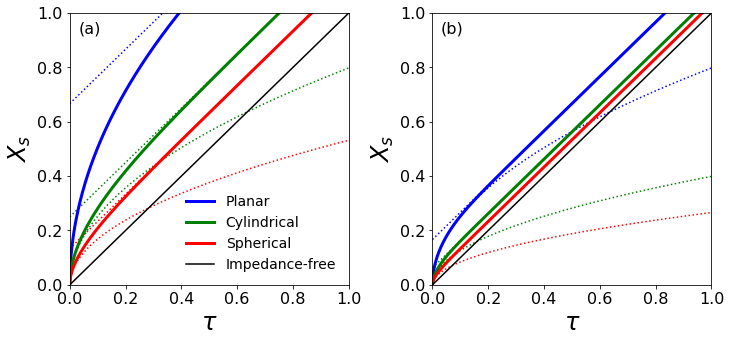

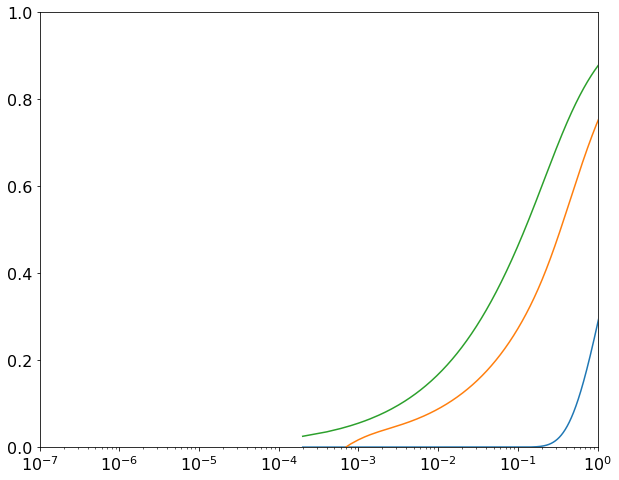

In [48]:
#Figure 2
tau_arr = np.linspace(1e-4, 1, 10000)
Q_arr = [0.5, 2]
title = ['(a)', '(b)']

plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=16)

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(11.5, 5))
plt.subplots_adjust(wspace = .3)

pQest_arr = np.zeros((len(Q_arr), len(tau_arr)))
cQest_arr = np.zeros((len(Q_arr), len(tau_arr)))
sQest_arr = np.zeros((len(Q_arr), len(tau_arr)))

pQerr_arr = np.zeros((len(Q_arr), len(tau_arr)))
cQerr_arr = np.zeros((len(Q_arr), len(tau_arr)))
sQerr_arr = np.zeros((len(Q_arr), len(tau_arr)))

for Q in range(len(Q_arr)):
    pifunc = lambda tau: 2*np.sqrt(tau)/(1*np.sqrt(np.pi*Q_arr[Q]))
    cifunc = lambda tau: 2*np.sqrt(tau)/(2*np.sqrt(np.pi*Q_arr[Q]))
    sifunc = lambda tau: 2*np.sqrt(tau)/(3*np.sqrt(np.pi*Q_arr[Q]))

    pffunc = lambda tau: tau + 1/(1*3*Q_arr[Q])
    cffunc = lambda tau: tau + 1/(2*4*Q_arr[Q])
    sffunc = lambda tau: tau + 1/(3*5*Q_arr[Q])

    pfunc = lambda tau: tau + (1/(1*Q_arr[Q]))*(1/3 - 2*(np.sum(np.exp(-palphas*tau*Q_arr[Q])/palphas)))
    cfunc = lambda tau: tau + (1/(2*Q_arr[Q]))*(1/4 - 2*(np.sum(np.exp(-calphas*tau*Q_arr[Q])/calphas)))
    sfunc = lambda tau: tau + (1/(3*Q_arr[Q]))*(1/5 - 2*(np.sum(np.exp(-salphas*tau*Q_arr[Q])/salphas)))

    piX_sol = np.zeros(len(tau_arr))
    ciX_sol = np.zeros(len(tau_arr))
    siX_sol = np.zeros(len(tau_arr))

    pfX_sol = np.zeros(len(tau_arr))
    cfX_sol = np.zeros(len(tau_arr))
    sfX_sol = np.zeros(len(tau_arr))

    pX_sol = np.zeros(len(tau_arr))
    cX_sol = np.zeros(len(tau_arr))
    sX_sol = np.zeros(len(tau_arr))

    for i in range(len(tau_arr)):
        piX_sol[i] = pifunc(tau_arr[i])
        ciX_sol[i] = cifunc(tau_arr[i])
        siX_sol[i] = sifunc(tau_arr[i])

        pfX_sol[i] = pffunc(tau_arr[i])
        cfX_sol[i] = cffunc(tau_arr[i])
        sfX_sol[i] = sffunc(tau_arr[i])

        pX_sol[i] = pfunc(tau_arr[i])
        cX_sol[i] = cfunc(tau_arr[i])
        sX_sol[i] = sfunc(tau_arr[i])    
        
        pQest_arr[Q][i] = np.power(2, 2)*tau_arr[i]/(np.pi*np.power(1*pX_sol[i], 2))
        cQest_arr[Q][i] = np.power(2, 2)*tau_arr[i]/(np.pi*np.power(2*cX_sol[i], 2))
        sQest_arr[Q][i] = np.power(2, 2)*tau_arr[i]/(np.pi*np.power(3*sX_sol[i], 2))
        
        pQerr_arr[Q][i] = (Q_arr[Q] - pQest_arr[Q][i])/Q_arr[Q]
        cQerr_arr[Q][i] = (Q_arr[Q] - cQest_arr[Q][i])/Q_arr[Q]
        sQerr_arr[Q][i] = (Q_arr[Q] - sQest_arr[Q][i])/Q_arr[Q]
            
    axs[Q].plot(tau_arr, piX_sol, ':b')
    axs[Q].plot(tau_arr, ciX_sol, ':g')
    axs[Q].plot(tau_arr, siX_sol, ':r')

    axs[Q].plot(tau_arr, pfX_sol, ':b')
    axs[Q].plot(tau_arr, cfX_sol, ':g')
    axs[Q].plot(tau_arr, sfX_sol, ':r')
    
    axs[Q].plot(tau_arr, pX_sol, '-b', linewidth=3, label="Planar")
    axs[Q].plot(tau_arr, cX_sol, '-g', linewidth=3, label="Cylindrical")
    axs[Q].plot(tau_arr, sX_sol, '-r', linewidth=3, label="Spherical")
    
    axs[Q].plot(tau_arr, tau_arr, '-k', linewidth=1.5, label="Impedance-free")
    
    axs[Q].set_xlim([0, 1])
    axs[Q].set_ylim([0, 1])
    
    axs[Q].set_xlabel('$τ$', fontsize = 24)
    axs[Q].set_ylabel('$X_{s}$', fontsize = 24)
    
    axs[Q].annotate(title[Q], xy = (0.03, 0.97), xycoords = 'axes fraction', horizontalalignment='left', verticalalignment='top', fontsize = 16)

axs[0].legend(fontsize="14", frameon=False)
plt.savefig('fig2.png', bbox_inches="tight")

plt.figure(2, figsize=(10, 8))
plt.semilogx(Q_arr[1]*tau_arr, pQerr_arr[1])
plt.semilogx(Q_arr[1]*tau_arr, cQerr_arr[1])
plt.semilogx(Q_arr[1]*tau_arr, sQerr_arr[1])
plt.xlim([1e-7, 1])
plt.ylim([0, 1])


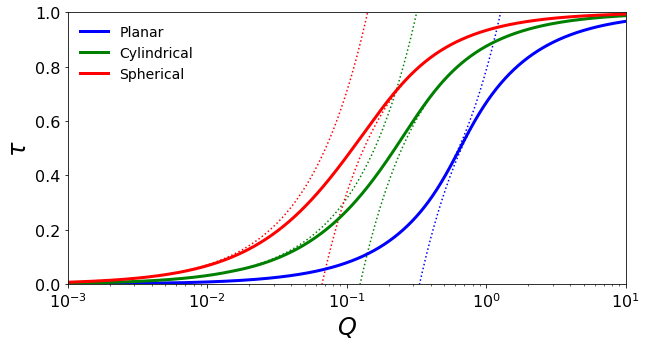

In [126]:
#Figure 3
nQ = 1000
Q_arr = np.logspace(-3, 1, nQ)

plt.rc('axes', labelsize=24)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=16)

plt.figure(figsize = (10, 5))

pitau_sol = np.zeros(len(Q_arr))
citau_sol = np.zeros(len(Q_arr))
sitau_sol = np.zeros(len(Q_arr))

pftau_sol = np.zeros(len(Q_arr))
cftau_sol = np.zeros(len(Q_arr))
sftau_sol = np.zeros(len(Q_arr))

ptau_sol = np.zeros(len(Q_arr))
ctau_sol = np.zeros(len(Q_arr))
stau_sol = np.zeros(len(Q_arr))

for Q in range(len(Q_arr)):
    pifunc = lambda tau: 2*np.sqrt(tau)/(1*np.sqrt(np.pi*Q_arr[Q])) - 1
    cifunc = lambda tau: 2*np.sqrt(tau)/(2*np.sqrt(np.pi*Q_arr[Q])) - 1
    sifunc = lambda tau: 2*np.sqrt(tau)/(3*np.sqrt(np.pi*Q_arr[Q])) - 1

    pffunc = lambda tau: tau + 1/(1*3*Q_arr[Q]) - 1
    cffunc = lambda tau: tau + 1/(2*4*Q_arr[Q]) - 1
    sffunc = lambda tau: tau + 1/(3*5*Q_arr[Q]) - 1

    pfunc = lambda tau: tau + (1/(1*Q_arr[Q]))*(1/3 - 2*(np.sum(np.exp(-palphas*tau*Q_arr[Q])/palphas))) - 1
    cfunc = lambda tau: tau + (1/(2*Q_arr[Q]))*(1/4 - 2*(np.sum(np.exp(-calphas*tau*Q_arr[Q])/calphas))) - 1
    sfunc = lambda tau: tau + (1/(3*Q_arr[Q]))*(1/5 - 2*(np.sum(np.exp(-salphas*tau*Q_arr[Q])/salphas))) - 1
    
    tau_guess = 0.5
    
    pitau_sol[Q] = fsolve(pifunc, tau_guess, factor=1.)
    citau_sol[Q] = fsolve(cifunc, tau_guess, factor=1.)
    sitau_sol[Q] = fsolve(sifunc, tau_guess, factor=1.)
            
    pftau_sol[Q] = fsolve(pffunc, tau_guess, factor=1.)
    cftau_sol[Q] = fsolve(cffunc, tau_guess, factor=1.)
    sftau_sol[Q] = fsolve(sffunc, tau_guess, factor=1.)
    
    ptau_sol[Q] = fsolve(pfunc, tau_guess, factor=1.)
    if ptau_sol[Q] < 0:
        ptau_sol[Q] = 0
    elif ptau_sol[Q] > pitau_sol[Q]:
        ptau_sol[Q] = pitau_sol[Q]
    ctau_sol[Q] = fsolve(cfunc, tau_guess, factor=1.)
    if ctau_sol[Q] < 0:
        ctau_sol[Q] = 0
    elif ctau_sol[Q] > citau_sol[Q]:
        ctau_sol[Q] = citau_sol[Q]
    stau_sol[Q] = fsolve(sfunc, tau_guess, factor=1.)
    if stau_sol[Q] < 0:
        stau_sol[Q] = 0
    elif stau_sol[Q] > sitau_sol[Q]:
        stau_sol[Q] = sitau_sol[Q]

plt.semilogx(Q_arr, pitau_sol, ':b')
plt.semilogx(Q_arr, citau_sol, ':g')
plt.semilogx(Q_arr, sitau_sol, ':r')

plt.semilogx(Q_arr, pftau_sol, ':b')
plt.semilogx(Q_arr, cftau_sol, ':g')
plt.semilogx(Q_arr, sftau_sol, ':r')

plt.semilogx(Q_arr, ptau_sol, '-b', linewidth=3, label="Planar")
plt.semilogx(Q_arr, ctau_sol, '-g', linewidth=3, label="Cylindrical")
plt.semilogx(Q_arr, stau_sol, '-r', linewidth=3, label="Spherical")

plt.xlim([1e-3, 1e1])
plt.ylim([0, 1])

plt.xlabel('$Q$', fontsize = 24)
plt.ylabel('$τ$', fontsize = 24)

plt.legend(fontsize="14", frameon=False)
plt.savefig('fig3.png', bbox_inches="tight")

C:\Users\mitch\.conda\envs\Spyder425\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\mitch\AppData\Local\Temp/ipykernel_14964/1192757629.py:47: RuntimeWarning: overflow encountered in exp
  sfunc = lambda tau: tau + (1/(3*Q_arr[Q]))*(1/5 - 2*(np.sum(np.exp(-salphas*tau*Q_arr[Q])/salphas))) + Reff[R]/Q_arr[Q] - 1
C:\Users\mitch\.conda\envs\Spyder425\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\mitch\AppData\Local\Temp/ipykernel_14964/1192757629.py:47: RuntimeWarning: overflow encountered in exp
  sfunc = lambda tau: tau + (1/(3*Q_arr[Q]))*(1/5 - 2*(np.sum(np.exp(-salphas*tau*Q_arr[Q])/salphas))) + Reff[R]/Q_arr[Q] - 1
C:\Users\mitch\.conda\envs\Spyde

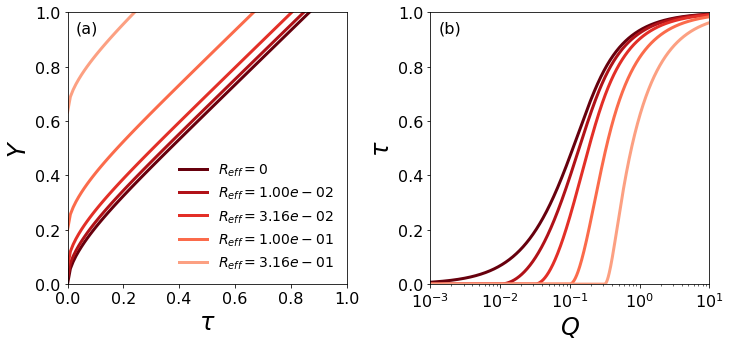

In [142]:
#Figure 4
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(11.5, 5))
plt.subplots_adjust(wspace = .3)

plt.rc('axes', labelsize=24)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=16)

colors = plt.get_cmap('Reds_r')(np.linspace(0,1,7))
title = ['(a)', '(b)']

#Figure 4a
Q = 0.5
Reff = [0, np.power(10., -2.), np.power(10., -1.5), np.power(10., -1.), np.power(10., -0.5)]
tau_arr = np.linspace(0, 1, 101)
sX_sol = np.zeros(len(tau_arr))

for R in range(len(Reff)):
    sfunc = lambda tau: tau + (1/(3*Q))*(1/5 - 2*(np.sum(np.exp(-salphas*tau*Q)/salphas))) + Reff[R]/Q

    for i in range(len(tau_arr)):
        sX_sol[i] = sfunc(tau_arr[i])    
        
    if R == 0:
        label = '$R_{eff} = 0$'
    else:
        label = '$R_{eff} = $' + '${0:.2e}$'.format(Reff[R])
            
    axs[0].plot(tau_arr, sX_sol, '-', linewidth=3, label=label, color = colors[R])

axs[0].set_xlim([0, 1])
axs[0].set_ylim([0, 1])

axs[0].set_xlabel('$τ$', fontsize = 24)
axs[0].set_ylabel('$Y$', fontsize = 24)

axs[0].annotate(title[0], xy = (0.03, 0.97), xycoords = 'axes fraction', horizontalalignment='left', verticalalignment='top', fontsize = 16)

#Figure 4b
nQ = 1000
Q_arr = np.logspace(-3, 1, nQ)
stau_sol = np.zeros(len(Q_arr))

for R in range(len(Reff)):
    for Q in range(len(Q_arr)):
        sfunc = lambda tau: tau + (1/(3*Q_arr[Q]))*(1/5 - 2*(np.sum(np.exp(-salphas*tau*Q_arr[Q])/salphas))) + Reff[R]/Q_arr[Q] - 1

        tau_guess = 0.5
        stau_sol[Q] = fsolve(sfunc, tau_guess, factor=1.)
        if stau_sol[Q] < 0:
                stau_sol[Q] = 0

    axs[1].semilogx(Q_arr, stau_sol, '-', linewidth=3, color = colors[R], label="Spherical")
    c = c + 1
    
axs[1].set_xlim([1e-3, 1e1])
axs[1].set_ylim([0, 1])

axs[1].set_xlabel('$Q$', fontsize = 24)
axs[1].set_ylabel('$τ$', fontsize = 24)

axs[0].legend(fontsize="14", frameon=False)

axs[1].annotate(title[1], xy = (0.03, 0.97), xycoords = 'axes fraction', horizontalalignment='left', verticalalignment='top', fontsize = 16)

plt.savefig('fig4.png', bbox_inches="tight")

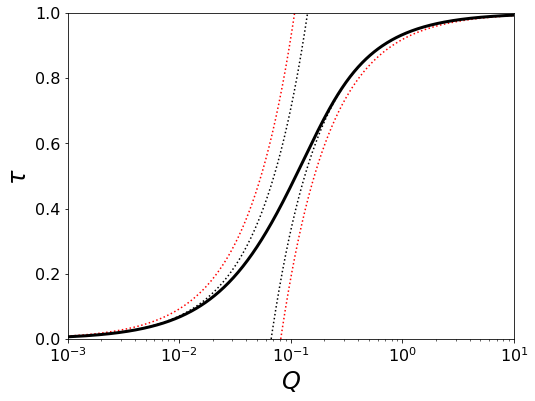

In [30]:
#Figure n (particle size V)
nQ = 1000
Reff = 0.0

Q_arr = np.logspace(-4, 2, nQ)

plt.rc('axes', labelsize=24)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=16)

plt.figure(figsize = (8, 6))

sitau_sol = np.zeros(len(Q_arr))
sivtau_sol = np.zeros(len(Q_arr))
sftau_sol = np.zeros(len(Q_arr))
sfvtau_sol = np.zeros(len(Q_arr))
stau_sol = np.zeros(len(Q_arr))

for Q in range(len(Q_arr)):
    sifunc = lambda tau: 2*np.sqrt(tau)/(3*np.sqrt(np.pi*Q_arr[Q])) + Reff/Q_arr[Q] - 1
    sivfunc = lambda tau: 0.8749*2*np.sqrt(tau)/(3*np.sqrt(np.pi*Q_arr[Q])) + Reff/Q_arr[Q] - 1
    sffunc = lambda tau: tau + 1/(3*5*Q_arr[Q]) + Reff/Q_arr[Q] - 1
    sfvfunc = lambda tau: tau + 1.219*1/(3*5*Q_arr[Q]) + Reff/Q_arr[Q] - 1
    sfunc = lambda tau: tau + (1/(3*Q_arr[Q]))*(1/5 - 2*(np.sum(np.exp(-salphas*tau*Q_arr[Q])/salphas))) + Reff/Q_arr[Q] - 1
    
    tau_guess = 0.5
    
    sitau_sol[Q] = fsolve(sifunc, tau_guess, factor=1.)
    sivtau_sol[Q] = fsolve(sivfunc, tau_guess, factor=1.)
    sftau_sol[Q] = fsolve(sffunc, tau_guess, factor=1.)
    sfvtau_sol[Q] = fsolve(sfvfunc, tau_guess, factor=1.)
    stau_sol[Q] = fsolve(sfunc, tau_guess, factor=1.)
    if stau_sol[Q] < 0:
            stau_sol[Q] = 0

plt.semilogx(Q_arr, sitau_sol, ':k')
plt.semilogx(Q_arr, sivtau_sol, ':r')
plt.semilogx(Q_arr, sftau_sol, ':k')
plt.semilogx(Q_arr, sfvtau_sol, ':r')
plt.semilogx(Q_arr, stau_sol, '-k', linewidth=3)

plt.xlim([1e-3, 1e1])
plt.ylim([0, 1])

plt.xlabel('$Q$')
plt.ylabel('$τ$')
    #axs[Q].title.set_text('Q = {}'.format(Q_arr[Q]))
    #axs[Q].title.set_size(24)
    #axs[Q].title.set_weight('bold')

plt.savefig('fign.png')

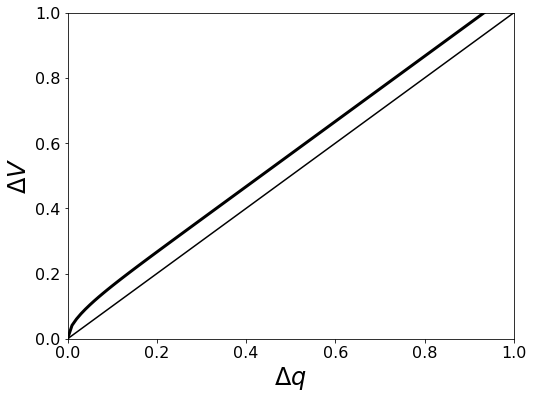

In [20]:
#Figure m
tau_arr = np.linspace(0, 1, 101)
Q = 1

plt.rc('axes', labelsize=24)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=16)

plt.figure(figsize = (8, 6))

sifunc = lambda tau: 2*np.sqrt(tau)/(3*np.sqrt(np.pi*Q))
sffunc = lambda tau: tau + 1/(3*5*Q)
sfunc = lambda tau: tau + (1/(3*Q))*(1/5 - 2*(np.sum(np.exp(-salphas*tau*Q)/salphas)))

siX_sol = np.zeros(len(tau_arr))
sfX_sol = np.zeros(len(tau_arr))
sX_sol = np.zeros(len(tau_arr))

for i in range(len(tau_arr)):
    siX_sol[i] = sifunc(tau_arr[i])
    sfX_sol[i] = sffunc(tau_arr[i])
    sX_sol[i] = sfunc(tau_arr[i])    

#plt.plot(tau_arr, siX_sol, ':k')
#plt.plot(tau_arr, sfX_sol, ':k')
plt.plot(tau_arr, sX_sol, '-k', linewidth=3)

plt.plot(tau_arr, tau_arr, '-k', linewidth=1.5)

plt.xlim([0, 1])
plt.ylim([0, 1])

plt.xlabel('$Δq$')
plt.ylabel('$ΔV$')
#axs[Q].title.set_text('Q = {}'.format(Q_arr[Q]))
#axs[Q].title.set_size(24)
#axs[Q].title.set_weight('bold')

plt.savefig('figm.png')